In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

# 1. 기존의 프로그램 방식
- 회귀분석(linear regression) 설명 사이트 :
https://gbhat.com/machine_learning/linear_regression.html
- 오차함수 : MSE(오차제곱평균), RMSE(루트를 취하기 때문에 MSE의 단점이 어느정도 해소. 이상치에 덜 민감), MAE(mean absolute erro error ; 절대값평균)
- https://jysden.medium.com/%EC%96%B8%EC%A0%9C-mse-maermse%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EB%8A%94%EA%B0%80-c473bd831c62 ![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*XRXgMqrr5rq-V1rW7SkrtA.png)
- 경사하강법 설명
 - https://www.mql5.com/ko/articles/11200

In [8]:
# 섭씨온도(input data = 독립변수)를 화씨온도(target data = 종속변수)

def celsius_to_faherenheit(c):
    return c*1.8 + 32

In [2]:
input_c = int(input('섭씨 온도는?'))
print('화씨 온도는', celsius_to_faherenheit(input_c))

섭씨 온도는?1
화씨 온도는 33.8


# 2. 딥러닝/머신러닝 프로그램 방식

- 1. 데이터 확보 및 생성
- 2. 데이터 전처리 : 스케일 조정, 훈련데이터셋(학습데이터셋), 검증데이터셋, 시험데이터셋 
- 3. 모델구성
- 4. 모델 학습 과정 설정
- 5. 모델 학습시키기(훈련, 검증데이터셋)
- 6. 모델 평가하기(시험데이터셋)
- 7. 모델 저장/사용(입력값이 주어지면 예측값을 받기)

## 2.1 노이즈가 없는 데이터 실습

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.config.list_physical_devices('GPU')
# [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] gpu있을경우 

[]

In [6]:
# 1. 데이터 확보(생성)

data_C = np.arange(100)
data_C # input데이터(독립변수)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [9]:
data_F = celsius_to_faherenheit(data_C)
data_F

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [12]:
# 2. 데이터 전처리 : 스케일조정(컴퓨터에게 학습시키기 위해 정규화/표준화) - 전체의 편차를 비슷하게

scaled_data_C = data_C/100
scaled_data_F = data_F/100
print('독립변수 :', scaled_data_C)
print('타겟변수 :', scaled_data_F)

독립변수 : [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
타겟변수 : [0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.7

In [15]:
# 3. 모델 구성

from tensorflow.keras.models import Sequential   # 모델 생성
from tensorflow.keras.layers import Input, Dense # 입력값과 출력값으로 layer층 지정

model = Sequential()
model.add(Input(shape=(1,))) # 입력(독립)변수의 shape
model.add(Dense(1))          # 타겟(종속, 출력)변수의 갯수
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [16]:
# 4. 모델 학습과정 설정

model.compile(loss='mse', optimizer='rmsprop', metrics=['mae']) # optimizer은 lecnote의 오솔길에 종류있음. Adam을 제일 많이씀
#              손실함수         옵티마이저            평가지표

In [17]:
# 학습전 예측

model.predict(np.array([[0],
                       [0.01]]))

1/1 [==============================] - 0s 134ms/step


array([[ 0.       ],
       [-0.0066123]], dtype=float32)

In [18]:
# 학습전 모델 저장

model.save('model/befor_learning.h5')

In [19]:
# 5. 모델 학습시키기 - 1번만 실행

hist = model.fit(scaled_data_C, scaled_data_F, epochs=1000, verbose=2) 
#              독립변수(훈련data),타겟변수(훈련data),학습횟수,학습시 출력여부

Epoch 1/1000
4/4 - 0s - loss: 2.8570 - mae: 1.5339 - 327ms/epoch - 82ms/step
Epoch 2/1000
4/4 - 0s - loss: 2.8189 - mae: 1.5227 - 5ms/epoch - 1ms/step
Epoch 3/1000
4/4 - 0s - loss: 2.7917 - mae: 1.5142 - 7ms/epoch - 2ms/step
Epoch 4/1000
4/4 - 0s - loss: 2.7706 - mae: 1.5080 - 6ms/epoch - 1ms/step
Epoch 5/1000
4/4 - 0s - loss: 2.7508 - mae: 1.5019 - 5ms/epoch - 1ms/step
Epoch 6/1000
4/4 - 0s - loss: 2.7302 - mae: 1.4957 - 6ms/epoch - 1ms/step
Epoch 7/1000
4/4 - 0s - loss: 2.7090 - mae: 1.4891 - 5ms/epoch - 1ms/step
Epoch 8/1000
4/4 - 0s - loss: 2.6880 - mae: 1.4826 - 5ms/epoch - 1ms/step
Epoch 9/1000
4/4 - 0s - loss: 2.6687 - mae: 1.4765 - 5ms/epoch - 1ms/step
Epoch 10/1000
4/4 - 0s - loss: 2.6512 - mae: 1.4712 - 4ms/epoch - 995us/step
Epoch 11/1000
4/4 - 0s - loss: 2.6336 - mae: 1.4657 - 5ms/epoch - 1ms/step
Epoch 12/1000
4/4 - 0s - loss: 2.6137 - mae: 1.4595 - 6ms/epoch - 1ms/step
Epoch 13/1000
4/4 - 0s - loss: 2.5966 - mae: 1.4539 - 7ms/epoch - 2ms/step
Epoch 14/1000
4/4 - 0s - loss

Epoch 110/1000
4/4 - 0s - loss: 1.1381 - mae: 0.8986 - 5ms/epoch - 1ms/step
Epoch 111/1000
4/4 - 0s - loss: 1.1259 - mae: 0.8930 - 4ms/epoch - 997us/step
Epoch 112/1000
4/4 - 0s - loss: 1.1151 - mae: 0.8881 - 6ms/epoch - 1ms/step
Epoch 113/1000
4/4 - 0s - loss: 1.1024 - mae: 0.8822 - 4ms/epoch - 998us/step
Epoch 114/1000
4/4 - 0s - loss: 1.0907 - mae: 0.8769 - 4ms/epoch - 998us/step
Epoch 115/1000
4/4 - 0s - loss: 1.0792 - mae: 0.8716 - 5ms/epoch - 1ms/step
Epoch 116/1000
4/4 - 0s - loss: 1.0689 - mae: 0.8667 - 4ms/epoch - 998us/step
Epoch 117/1000
4/4 - 0s - loss: 1.0583 - mae: 0.8619 - 6ms/epoch - 1ms/step
Epoch 118/1000
4/4 - 0s - loss: 1.0467 - mae: 0.8565 - 5ms/epoch - 1ms/step
Epoch 119/1000
4/4 - 0s - loss: 1.0350 - mae: 0.8509 - 4ms/epoch - 995us/step
Epoch 120/1000
4/4 - 0s - loss: 1.0253 - mae: 0.8465 - 6ms/epoch - 1ms/step
Epoch 121/1000
4/4 - 0s - loss: 1.0146 - mae: 0.8414 - 5ms/epoch - 1ms/step
Epoch 122/1000
4/4 - 0s - loss: 1.0040 - mae: 0.8364 - 7ms/epoch - 2ms/step
Ep

Epoch 217/1000
4/4 - 0s - loss: 0.3057 - mae: 0.4593 - 4ms/epoch - 997us/step
Epoch 218/1000
4/4 - 0s - loss: 0.3017 - mae: 0.4565 - 6ms/epoch - 1ms/step
Epoch 219/1000
4/4 - 0s - loss: 0.2969 - mae: 0.4535 - 4ms/epoch - 996us/step
Epoch 220/1000
4/4 - 0s - loss: 0.2931 - mae: 0.4509 - 5ms/epoch - 1ms/step
Epoch 221/1000
4/4 - 0s - loss: 0.2896 - mae: 0.4485 - 5ms/epoch - 1ms/step
Epoch 222/1000
4/4 - 0s - loss: 0.2856 - mae: 0.4458 - 4ms/epoch - 1ms/step
Epoch 223/1000
4/4 - 0s - loss: 0.2824 - mae: 0.4437 - 5ms/epoch - 1ms/step
Epoch 224/1000
4/4 - 0s - loss: 0.2793 - mae: 0.4417 - 4ms/epoch - 1ms/step
Epoch 225/1000
4/4 - 0s - loss: 0.2752 - mae: 0.4387 - 5ms/epoch - 1ms/step
Epoch 226/1000
4/4 - 0s - loss: 0.2723 - mae: 0.4368 - 4ms/epoch - 998us/step
Epoch 227/1000
4/4 - 0s - loss: 0.2695 - mae: 0.4349 - 4ms/epoch - 995us/step
Epoch 228/1000
4/4 - 0s - loss: 0.2661 - mae: 0.4325 - 5ms/epoch - 1ms/step
Epoch 229/1000
4/4 - 0s - loss: 0.2619 - mae: 0.4296 - 3ms/epoch - 749us/step
Ep

Epoch 324/1000
4/4 - 0s - loss: 0.1321 - mae: 0.3143 - 4ms/epoch - 997us/step
Epoch 325/1000
4/4 - 0s - loss: 0.1313 - mae: 0.3134 - 7ms/epoch - 2ms/step
Epoch 326/1000
4/4 - 0s - loss: 0.1306 - mae: 0.3126 - 4ms/epoch - 996us/step
Epoch 327/1000
4/4 - 0s - loss: 0.1299 - mae: 0.3117 - 5ms/epoch - 1ms/step
Epoch 328/1000
4/4 - 0s - loss: 0.1292 - mae: 0.3109 - 4ms/epoch - 995us/step
Epoch 329/1000
4/4 - 0s - loss: 0.1284 - mae: 0.3099 - 3ms/epoch - 747us/step
Epoch 330/1000
4/4 - 0s - loss: 0.1278 - mae: 0.3091 - 7ms/epoch - 2ms/step
Epoch 331/1000
4/4 - 0s - loss: 0.1271 - mae: 0.3082 - 4ms/epoch - 996us/step
Epoch 332/1000
4/4 - 0s - loss: 0.1264 - mae: 0.3073 - 4ms/epoch - 996us/step
Epoch 333/1000
4/4 - 0s - loss: 0.1258 - mae: 0.3066 - 5ms/epoch - 1ms/step
Epoch 334/1000
4/4 - 0s - loss: 0.1252 - mae: 0.3059 - 4ms/epoch - 997us/step
Epoch 335/1000
4/4 - 0s - loss: 0.1245 - mae: 0.3051 - 7ms/epoch - 2ms/step
Epoch 336/1000
4/4 - 0s - loss: 0.1237 - mae: 0.3040 - 4ms/epoch - 998us/s

Epoch 431/1000
4/4 - 0s - loss: 0.0680 - mae: 0.2251 - 4ms/epoch - 996us/step
Epoch 432/1000
4/4 - 0s - loss: 0.0674 - mae: 0.2241 - 4ms/epoch - 995us/step
Epoch 433/1000
4/4 - 0s - loss: 0.0670 - mae: 0.2232 - 18ms/epoch - 4ms/step
Epoch 434/1000
4/4 - 0s - loss: 0.0665 - mae: 0.2224 - 6ms/epoch - 1ms/step
Epoch 435/1000
4/4 - 0s - loss: 0.0660 - mae: 0.2218 - 4ms/epoch - 945us/step
Epoch 436/1000
4/4 - 0s - loss: 0.0655 - mae: 0.2209 - 5ms/epoch - 1ms/step
Epoch 437/1000
4/4 - 0s - loss: 0.0651 - mae: 0.2202 - 4ms/epoch - 995us/step
Epoch 438/1000
4/4 - 0s - loss: 0.0646 - mae: 0.2193 - 5ms/epoch - 1ms/step
Epoch 439/1000
4/4 - 0s - loss: 0.0641 - mae: 0.2185 - 4ms/epoch - 992us/step
Epoch 440/1000
4/4 - 0s - loss: 0.0635 - mae: 0.2175 - 3ms/epoch - 746us/step
Epoch 441/1000
4/4 - 0s - loss: 0.0630 - mae: 0.2167 - 7ms/epoch - 2ms/step
Epoch 442/1000
4/4 - 0s - loss: 0.0625 - mae: 0.2160 - 4ms/epoch - 997us/step
Epoch 443/1000
4/4 - 0s - loss: 0.0620 - mae: 0.2150 - 4ms/epoch - 1ms/st

Epoch 538/1000
4/4 - 0s - loss: 0.0241 - mae: 0.1340 - 4ms/epoch - 998us/step
Epoch 539/1000
4/4 - 0s - loss: 0.0239 - mae: 0.1334 - 4ms/epoch - 997us/step
Epoch 540/1000
4/4 - 0s - loss: 0.0236 - mae: 0.1326 - 4ms/epoch - 954us/step
Epoch 541/1000
4/4 - 0s - loss: 0.0233 - mae: 0.1318 - 4ms/epoch - 996us/step
Epoch 542/1000
4/4 - 0s - loss: 0.0231 - mae: 0.1310 - 5ms/epoch - 1ms/step
Epoch 543/1000
4/4 - 0s - loss: 0.0227 - mae: 0.1301 - 4ms/epoch - 995us/step
Epoch 544/1000
4/4 - 0s - loss: 0.0225 - mae: 0.1293 - 9ms/epoch - 2ms/step
Epoch 545/1000
4/4 - 0s - loss: 0.0223 - mae: 0.1285 - 4ms/epoch - 997us/step
Epoch 546/1000
4/4 - 0s - loss: 0.0220 - mae: 0.1280 - 6ms/epoch - 1ms/step
Epoch 547/1000
4/4 - 0s - loss: 0.0217 - mae: 0.1271 - 3ms/epoch - 747us/step
Epoch 548/1000
4/4 - 0s - loss: 0.0214 - mae: 0.1263 - 4ms/epoch - 998us/step
Epoch 549/1000
4/4 - 0s - loss: 0.0211 - mae: 0.1254 - 5ms/epoch - 1ms/step
Epoch 550/1000
4/4 - 0s - loss: 0.0208 - mae: 0.1246 - 3ms/epoch - 749us

Epoch 645/1000
4/4 - 0s - loss: 0.0031 - mae: 0.0481 - 6ms/epoch - 1ms/step
Epoch 646/1000
4/4 - 0s - loss: 0.0030 - mae: 0.0473 - 3ms/epoch - 754us/step
Epoch 647/1000
4/4 - 0s - loss: 0.0029 - mae: 0.0466 - 4ms/epoch - 997us/step
Epoch 648/1000
4/4 - 0s - loss: 0.0029 - mae: 0.0461 - 5ms/epoch - 1ms/step
Epoch 649/1000
4/4 - 0s - loss: 0.0028 - mae: 0.0453 - 4ms/epoch - 997us/step
Epoch 650/1000
4/4 - 0s - loss: 0.0027 - mae: 0.0447 - 6ms/epoch - 1ms/step
Epoch 651/1000
4/4 - 0s - loss: 0.0026 - mae: 0.0439 - 4ms/epoch - 1ms/step
Epoch 652/1000
4/4 - 0s - loss: 0.0025 - mae: 0.0433 - 4ms/epoch - 996us/step
Epoch 653/1000
4/4 - 0s - loss: 0.0024 - mae: 0.0424 - 5ms/epoch - 1ms/step
Epoch 654/1000
4/4 - 0s - loss: 0.0023 - mae: 0.0416 - 4ms/epoch - 1ms/step
Epoch 655/1000
4/4 - 0s - loss: 0.0022 - mae: 0.0406 - 4ms/epoch - 997us/step
Epoch 656/1000
4/4 - 0s - loss: 0.0021 - mae: 0.0397 - 4ms/epoch - 997us/step
Epoch 657/1000
4/4 - 0s - loss: 0.0020 - mae: 0.0389 - 4ms/epoch - 998us/ste

4/4 - 0s - loss: 8.4629e-07 - mae: 9.0231e-04 - 5ms/epoch - 1ms/step
Epoch 747/1000
4/4 - 0s - loss: 2.7742e-07 - mae: 5.1500e-04 - 4ms/epoch - 997us/step
Epoch 748/1000
4/4 - 0s - loss: 1.2769e-07 - mae: 3.4043e-04 - 7ms/epoch - 2ms/step
Epoch 749/1000
4/4 - 0s - loss: 1.5242e-06 - mae: 0.0012 - 4ms/epoch - 997us/step
Epoch 750/1000
4/4 - 0s - loss: 1.1666e-07 - mae: 3.3220e-04 - 4ms/epoch - 995us/step
Epoch 751/1000
4/4 - 0s - loss: 5.1476e-07 - mae: 7.0148e-04 - 5ms/epoch - 1ms/step
Epoch 752/1000
4/4 - 0s - loss: 1.1186e-06 - mae: 0.0010 - 4ms/epoch - 997us/step
Epoch 753/1000
4/4 - 0s - loss: 3.0103e-07 - mae: 5.3538e-04 - 4ms/epoch - 995us/step
Epoch 754/1000
4/4 - 0s - loss: 4.6803e-07 - mae: 6.6755e-04 - 3ms/epoch - 746us/step
Epoch 755/1000
4/4 - 0s - loss: 6.6080e-07 - mae: 7.9470e-04 - 4ms/epoch - 997us/step
Epoch 756/1000
4/4 - 0s - loss: 2.6550e-07 - mae: 5.0033e-04 - 8ms/epoch - 2ms/step
Epoch 757/1000
4/4 - 0s - loss: 1.2539e-06 - mae: 0.0011 - 4ms/epoch - 1ms/step
Epoch

4/4 - 0s - loss: 4.0177e-07 - mae: 6.1928e-04 - 4ms/epoch - 997us/step
Epoch 844/1000
4/4 - 0s - loss: 2.1610e-07 - mae: 4.5576e-04 - 6ms/epoch - 1ms/step
Epoch 845/1000
4/4 - 0s - loss: 6.4909e-07 - mae: 7.8779e-04 - 4ms/epoch - 955us/step
Epoch 846/1000
4/4 - 0s - loss: 4.8968e-07 - mae: 6.6185e-04 - 4ms/epoch - 997us/step
Epoch 847/1000
4/4 - 0s - loss: 8.4169e-07 - mae: 9.0118e-04 - 5ms/epoch - 1ms/step
Epoch 848/1000
4/4 - 0s - loss: 6.9928e-07 - mae: 8.0327e-04 - 4ms/epoch - 998us/step
Epoch 849/1000
4/4 - 0s - loss: 1.8232e-07 - mae: 4.1981e-04 - 7ms/epoch - 2ms/step
Epoch 850/1000
4/4 - 0s - loss: 7.0519e-07 - mae: 8.2193e-04 - 4ms/epoch - 997us/step
Epoch 851/1000
4/4 - 0s - loss: 7.2793e-07 - mae: 8.3828e-04 - 5ms/epoch - 1ms/step
Epoch 852/1000
4/4 - 0s - loss: 2.7395e-07 - mae: 5.1010e-04 - 4ms/epoch - 996us/step
Epoch 853/1000
4/4 - 0s - loss: 3.0656e-07 - mae: 5.3430e-04 - 4ms/epoch - 996us/step
Epoch 854/1000
4/4 - 0s - loss: 1.4480e-06 - mae: 0.0012 - 6ms/epoch - 1ms/st

Epoch 940/1000
4/4 - 0s - loss: 1.3256e-06 - mae: 0.0011 - 4ms/epoch - 998us/step
Epoch 941/1000
4/4 - 0s - loss: 5.1578e-07 - mae: 6.8778e-04 - 5ms/epoch - 1ms/step
Epoch 942/1000
4/4 - 0s - loss: 7.8633e-08 - mae: 2.7540e-04 - 5ms/epoch - 1ms/step
Epoch 943/1000
4/4 - 0s - loss: 2.8816e-07 - mae: 5.0783e-04 - 4ms/epoch - 997us/step
Epoch 944/1000
4/4 - 0s - loss: 1.4085e-06 - mae: 0.0012 - 4ms/epoch - 998us/step
Epoch 945/1000
4/4 - 0s - loss: 7.0474e-07 - mae: 7.7338e-04 - 4ms/epoch - 997us/step
Epoch 946/1000
4/4 - 0s - loss: 7.9971e-08 - mae: 2.6307e-04 - 4ms/epoch - 1ms/step
Epoch 947/1000
4/4 - 0s - loss: 9.0466e-08 - mae: 2.7436e-04 - 5ms/epoch - 1ms/step
Epoch 948/1000
4/4 - 0s - loss: 1.2502e-06 - mae: 0.0011 - 4ms/epoch - 996us/step
Epoch 949/1000
4/4 - 0s - loss: 7.2002e-07 - mae: 7.8008e-04 - 4ms/epoch - 997us/step
Epoch 950/1000
4/4 - 0s - loss: 7.0420e-08 - mae: 2.3955e-04 - 5ms/epoch - 1ms/step
Epoch 951/1000
4/4 - 0s - loss: 3.7338e-07 - mae: 5.8015e-04 - 4ms/epoch - 1

In [21]:
# 6. 모델 과정 시각화

hist.history.keys()

dict_keys(['loss', 'mae'])

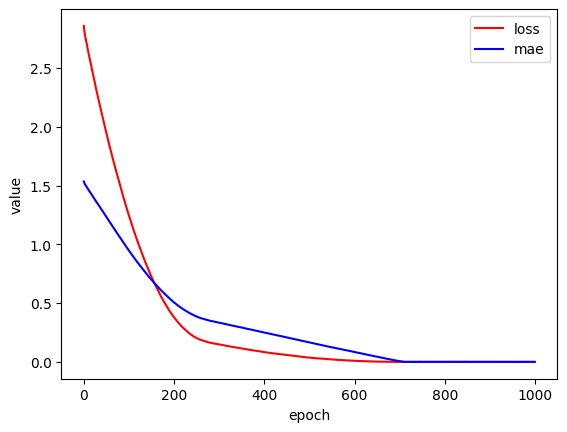

In [28]:
plt.plot(hist.history['loss'], 'r', label='loss')
plt.plot(hist.history['mae'], 'b', label='mae')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('value')
plt.show()

In [29]:
# 7. 모델 사용/저장

model.predict(np.array([[0],
                       [0.01],
                       [0.02]])) #0도와 1도(나누기 100을해서),2도

1/1 [==============================] - 0s 15ms/step


array([[0.32054862],
       [0.33855855],
       [0.35656852]], dtype=float32)

In [30]:
model.save('model/after_learning.h5')

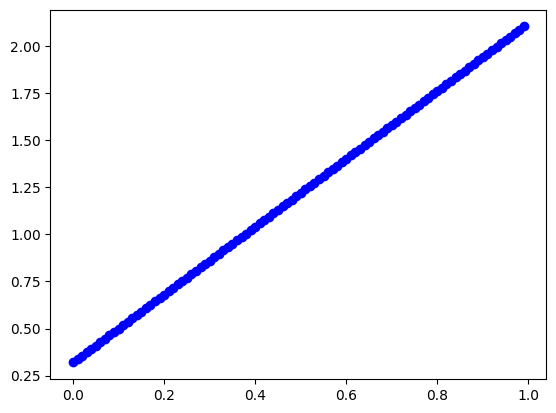

In [32]:
# 실제값 그래프

plt.scatter(x=scaled_data_C, y=scaled_data_F, c='b')
plt.show()

In [35]:
y_hat = model.predict([scaled_data_C]) #2차원을 넣어햐하는데 scaled_data_C는 1차원이라 []를 하나 감싸줘야함
for h,y in zip(y_hat[::20], scaled_data_F[::20]):
    print(h,y)

4/4 [==============================] - 0s 2ms/step
[0.32054862] 0.32
[0.68074745] 0.68
[1.0409462] 1.04
[1.4011451] 1.4
[1.761344] 1.76


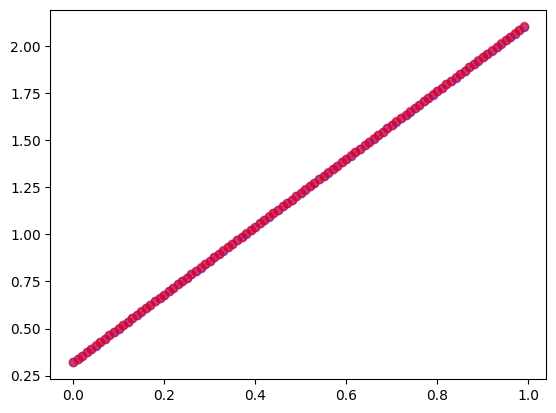

In [38]:
plt.scatter(x=scaled_data_C, y=scaled_data_F, c='b', alpha=0.5) # alpha=0 투명 ~ 1 불투명
plt.scatter(x=scaled_data_C, y=y_hat, c='r', alpha=0.5)
plt.show()

## 2.2 노이즈가 있는 데이터로 실습

In [51]:
# noise = 평균 0, 표준편차 0.1인 100개의 배열

np.random.seed(707)
noise = np.random.normal(0, scale=0.1, size=100)
noised_scaled_data_F = scaled_data_F + noise
print('독립변수 :', scaled_data_C)
print('타겟변수 :', noised_scaled_data_F)

독립변수 : [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
타겟변수 : [0.27500034 0.20410134 0.39498826 0.27117424 0.26897164 0.35314388
 0.4496784  0.42612159 0.49409646 0.45740286 0.31574183 0.67996337
 0.46117139 0.66152189 0.45319086 0.4519712  0.73018132 0.54170904
 0.68386841 0.75022628 0.65735179 0.76512782 0.57019861 0.79130977
 0.62965251 0.60058611 0.81087191 0.79345666 0.90825121 0.80020546
 0.8489619  0.72808603 0.98336163 0.78173322 0.8212351  1.05542797
 0.86566002 0.99728791 1.14628604 0.93021808 0.91091956 1.20887357
 0.89807

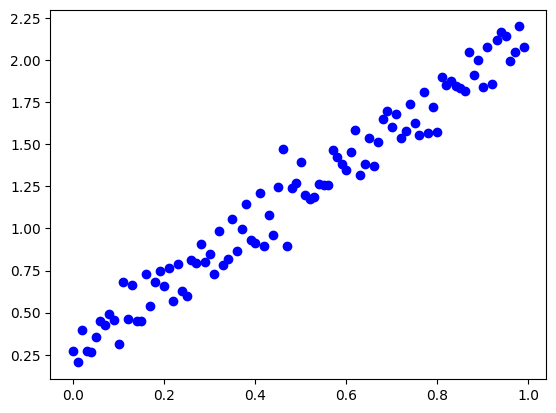

In [52]:
plt.scatter(x=scaled_data_C, y=noised_scaled_data_F, c='b')
plt.show()

In [89]:
# 3. 모델 구성
model2 = Sequential()
model2.add(Dense(1, input_shape=(1,))) # == model.add(Input(shape=(1,))) , model.add(Dense(1))   
print(model2.summary())


# 5. 학습과정 설정
model2.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])

# 6. 학습시키기
hist = model2.fit(scaled_data_C, noised_scaled_data_F, epochs=1000, verbose=2)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
4/4 - 0s - loss: 0.2186 - mae: 0.4451 - 210ms/epoch - 52ms/step
Epoch 2/1000
4/4 - 0s - loss: 0.2088 - mae: 0.4344 - 4ms/epoch - 997us/step
Epoch 3/1000
4/4 - 0s - loss: 0.2016 - mae: 0.4264 - 5ms/epoch - 1ms/step
Epoch 4/1000
4/4 - 0s - loss: 0.1952 - mae: 0.4191 - 4ms/epoch - 972us/step
Epoch 5/1000
4/4 - 0s - loss: 0.1894 - mae: 0.4124 - 4ms/epoch - 997us/step
Epoch 6/1000
4/4 - 0s - loss: 0.1845 - mae: 0.4066 - 4ms/epoch - 995us/step
Epoch 7/1000
4/4 - 0s - loss: 0.1792 - mae: 0.4003 - 4ms/epoch - 1ms/step
Epoch 8/1000
4/4 - 0s - loss: 0.1744 - mae: 0.3944 - 6

Epoch 102/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0884 - 6ms/epoch - 1ms/step
Epoch 103/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 4ms/epoch - 1ms/step
Epoch 104/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 4ms/epoch - 997us/step
Epoch 105/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0881 - 6ms/epoch - 2ms/step
Epoch 106/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0881 - 4ms/epoch - 1ms/step
Epoch 107/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 4ms/epoch - 998us/step
Epoch 108/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0881 - 4ms/epoch - 1ms/step
Epoch 109/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0884 - 4ms/epoch - 996us/step
Epoch 110/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 4ms/epoch - 998us/step
Epoch 111/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 4ms/epoch - 998us/step
Epoch 112/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0881 - 4ms/epoch - 997us/step
Epoch 113/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0883 - 6ms/epoch - 1ms/step
Epoch 114/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0883 - 4ms/epoch - 997us/ste

Epoch 209/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 996us/step
Epoch 210/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 12ms/epoch - 3ms/step
Epoch 211/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 6ms/epoch - 2ms/step
Epoch 212/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 3ms/epoch - 856us/step
Epoch 213/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 4ms/epoch - 997us/step
Epoch 214/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 5ms/epoch - 1ms/step
Epoch 215/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 995us/step
Epoch 216/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0876 - 4ms/epoch - 998us/step
Epoch 217/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 997us/step
Epoch 218/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 4ms/epoch - 995us/step
Epoch 219/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 5ms/epoch - 1ms/step
Epoch 220/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 4ms/epoch - 996us/step
Epoch 221/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 5ms/epoch - 1ms/

Epoch 316/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 1ms/step
Epoch 317/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 318/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 5ms/epoch - 1ms/step
Epoch 319/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 4ms/epoch - 998us/step
Epoch 320/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 7ms/epoch - 2ms/step
Epoch 321/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 997us/step
Epoch 322/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 6ms/epoch - 1ms/step
Epoch 323/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 4ms/epoch - 996us/step
Epoch 324/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 997us/step
Epoch 325/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 6ms/epoch - 1ms/step
Epoch 326/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0876 - 6ms/epoch - 1ms/step
Epoch 327/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 4ms/epoch - 989us/step
Epoch 328/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 1ms/step
Ep

Epoch 423/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 5ms/epoch - 1ms/step
Epoch 424/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 4ms/epoch - 998us/step
Epoch 425/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 5ms/epoch - 1ms/step
Epoch 426/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 1ms/step
Epoch 427/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 998us/step
Epoch 428/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 5ms/epoch - 1ms/step
Epoch 429/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 997us/step
Epoch 430/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 3ms/epoch - 748us/step
Epoch 431/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 432/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 996us/step
Epoch 433/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 997us/step
Epoch 434/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 998us/step
Epoch 435/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 4ms/epoch - 997us/s

Epoch 530/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 995us/step
Epoch 531/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 996us/step
Epoch 532/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 533/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 4ms/epoch - 995us/step
Epoch 534/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 997us/step
Epoch 535/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 997us/step
Epoch 536/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 4ms/epoch - 995us/step
Epoch 537/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 538/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 998us/step
Epoch 539/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0876 - 5ms/epoch - 1ms/step
Epoch 540/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 6ms/epoch - 1ms/step
Epoch 541/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 542/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 5ms/epoch - 1ms/ste

Epoch 637/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 5ms/epoch - 1ms/step
Epoch 638/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 990us/step
Epoch 639/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 640/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 6ms/epoch - 2ms/step
Epoch 641/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 642/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 997us/step
Epoch 643/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 999us/step
Epoch 644/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0876 - 4ms/epoch - 995us/step
Epoch 645/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 3ms/epoch - 754us/step
Epoch 646/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 996us/step
Epoch 647/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 1ms/step
Epoch 648/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 998us/step
Epoch 649/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 5ms/epoch - 1ms/ste

4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 5ms/epoch - 1ms/step
Epoch 744/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 7ms/epoch - 2ms/step
Epoch 745/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 1ms/step
Epoch 746/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 747/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 8ms/epoch - 2ms/step
Epoch 748/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 5ms/epoch - 1ms/step
Epoch 749/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 6ms/epoch - 1ms/step
Epoch 750/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 4ms/epoch - 997us/step
Epoch 751/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 997us/step
Epoch 752/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 6ms/epoch - 2ms/step
Epoch 753/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 997us/step
Epoch 754/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 4ms/epoch - 998us/step
Epoch 755/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 4ms/epoch - 998us/step
Epoch 756/1000
4/

Epoch 850/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0878 - 4ms/epoch - 1ms/step
Epoch 851/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 993us/step
Epoch 852/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 853/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 1ms/step
Epoch 854/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0879 - 5ms/epoch - 1ms/step
Epoch 855/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 4ms/epoch - 997us/step
Epoch 856/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 4ms/epoch - 997us/step
Epoch 857/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 6ms/epoch - 1ms/step
Epoch 858/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 1ms/step
Epoch 859/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 3ms/epoch - 748us/step
Epoch 860/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 861/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 862/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 6ms/epoch - 1ms/step
Epoc

Epoch 957/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 5ms/epoch - 1ms/step
Epoch 958/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 997us/step
Epoch 959/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0876 - 4ms/epoch - 998us/step
Epoch 960/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0876 - 7ms/epoch - 2ms/step
Epoch 961/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 997us/step
Epoch 962/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 4ms/epoch - 997us/step
Epoch 963/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 997us/step
Epoch 964/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 998us/step
Epoch 965/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 5ms/epoch - 1ms/step
Epoch 966/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0878 - 4ms/epoch - 955us/step
Epoch 967/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0880 - 3ms/epoch - 748us/step
Epoch 968/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0877 - 4ms/epoch - 1ms/step
Epoch 969/1000
4/4 - 0s - loss: 0.0110 - mae: 0.0877 - 4ms/epoch - 997us

In [70]:
# 6. 학습과정 살펴보기

hist.history.keys()

dict_keys(['loss', 'mae'])

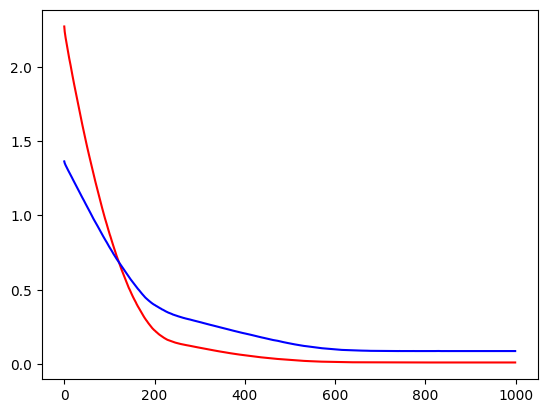

In [86]:
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['mae'], 'b')
plt.show()

In [87]:
# 7. 모델 사용

model2.predict(np.array([[-0.01],
                        [0],
                        [0.01],
                        [0.02]]))

1/1 [==============================] - 0s 29ms/step


array([[0.2624359 ],
       [0.28114206],
       [0.2998482 ],
       [0.3185543 ]], dtype=float32)

In [75]:
y_hat = model2.predict([scaled_data_C])
for h,y in zip(y_hat[::20], noised_scaled_data_F[::20]):
    print(h,y)

4/4 [==============================] - 0s 999us/step
[0.2965981] 0.2750003435726217
[0.6635338] 0.6573517921634632
[1.0304695] 0.9109195630083544
[1.3974053] 1.3455450551349164
[1.764341] 1.5738145874658984


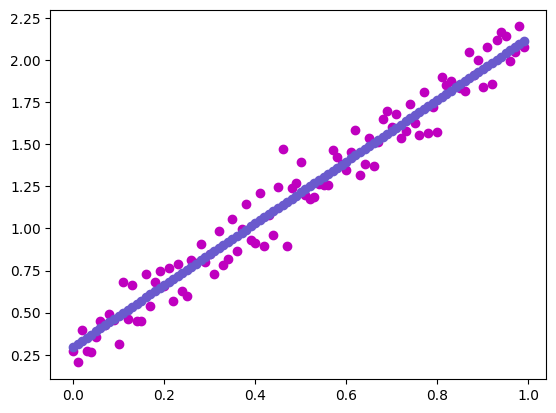

In [83]:
plt.scatter(x=scaled_data_C, y=noised_scaled_data_F, c='m')
plt.scatter(x=scaled_data_C, y=y_hat, c='slateblue')
plt.show()

In [90]:
# 모델 저장
model2.save('model/noised_after_learning.h5')


# 나중에 tensorflow높은버전 쓸때 사용. 지금은 위의것만
from tensorflow.keras.models import save_model
save_model(model2, 'model/noised_after_learning1.h5')
save_model(model2, 'model/noised_after_learning1.keras')

In [91]:
# 저장된 모델 사용하기

from tensorflow.keras.models import load_model
model3 = load_model('model/noised_after_learning.h5')

In [92]:
model3.predict(np.array([[-0.01],
                        [0],
                        [0.01],
                        [0.02]]))

1/1 [==============================] - 0s 28ms/step


array([[0.25976542],
       [0.2784013 ],
       [0.29703715],
       [0.31567302]], dtype=float32)